In [1]:
import flow_series as fs

# Create FlowSeries class.
## It creates networks, runs perturbations, finds paths, and highlights anomalous flows

In [2]:
help(fs.FlowSeries)

Help on class FlowSeries in module flow_series:

class FlowSeries(builtins.object)
 |  FlowSeries(n_nodes: int = 200, edge_prob: float = 0.35, multi_edge_prob: float = 0.8, weight_range: tuple = (1, 10), x: int = None, y: int = None, max_path_length: int = 2, num_intermediaries: str = 'random', data_path: str = '', log: bool = False)
 |  
 |  A class for generating, perturbing, and analyzing flow series in networks.
 |  
 |  Attributes:
 |      n_nodes (int): Number of nodes in the network.
 |      edge_prob (float): Probability of edge creation.
 |      multi_edge_prob (float): Probability of creating multiple edges between nodes.
 |      weight_range (tuple): Range of weights for edges.
 |      x (int): Source node for perturbation.
 |      y (int): Target node for perturbation.
 |      max_path_length (int): Maximum path length for analysis.
 |      num_intermediaries (str or int): Number of intermediary paths ('random' or specific number).
 |      data_path (str): Path to save or l

In [22]:
flows = fs.FlowSeries()

 24%|██▍       | 6/25 [00:00<00:00, 51.09it/s]

Saving networks...


 28%|██▊       | 7/25 [00:00<00:00, 49.89it/s]

Finding intermediaries...


100%|██████████| 25/25 [00:00<00:00, 86.19it/s]


In [27]:
print(f'Id of random selected random node: {flows.start_node[0]}')
print(f'Id of random selected end node: {flows.end_node[0]}')

Id of random selected random node: 34
Id of random selected end node: 8


## All possible paths from x and y, two randomly selected nodes

In [23]:
flows.possible_edge_sequences

[[(34, 0), (0, 8)],
 [(34, 2), (2, 8)],
 [(34, 9), (9, 8)],
 [(34, 14), (14, 8)],
 [(34, 20), (20, 8)],
 [(34, 29), (29, 8)],
 [(34, 102), (102, 8)],
 [(34, 106), (106, 8)]]

## Paths that are selected to simulate a fraud attemp with intermediares

In [24]:
flows.edge_sequences

[[(34, 20), (20, 8)], [(34, 102), (102, 8)]]

# Dataframe with all possible paths from x to y

In [28]:
flows.df

,path1,path2,amount1,count1,amount2,count2,date,path,weight,moving_avg,max_weight,delta_weight
0,"(34, 0)",(),6.618912,1,0.00000,0,2021-12-26,"34, 0",6.618912,6.424237,7.263118,0.026803
1,"(34, 0)",(),7.263118,1,0.00000,0,2022-01-02,"34, 0",7.263118,6.494075,7.263118,0.105883
2,"(34, 0)",(),6.304661,1,0.00000,0,2022-01-09,"34, 0",6.304661,6.433995,7.263118,-0.017807
3,"(34, 0)",(),6.240142,1,0.00000,0,2022-01-16,"34, 0",6.240142,6.606708,7.263118,-0.050470
4,"(34, 0)",(),6.856770,1,0.00000,0,2022-01-23,"34, 0",6.856770,6.666173,7.263118,0.026242
...,...,...,...,...,...,...,...,...,...,...,...,...
8839,"(34, 98)","(98, 93)",0.723686,1,2.37675,1,2022-04-24,"34, 98, 98, 93",0.723686,0.723686,4.486329,0.000000
8840,"(34, 98)","(98, 93)",0.723686,1,2.37675,1,2022-05-01,"34, 98, 98, 93",0.723686,0.723686,4.486329,0.000000
8841,"(34, 98)","(98, 93)",0.723686,1,2.37675,1,2022-05-08,"34, 98, 98, 93",0.723686,0.723686,4.486329,0.000000
8842,"(34, 98)","(98, 93)",0.723686,1,2.37675,1,2022-05-15,"34, 98, 98, 93",0.723686,0.723686,4.486329,0.000000


## Flows highlighted as anomalous

In [29]:
flows.paths

array(['34, 20, 20, 8', '34, 102, 102, 8', '34, 192, 192, 29',
       '34, 98, 98, 29', '34, 9, 9, 98', '34, 29, 29, 98', '34, 0, 0, 8'],
      dtype=object)

## Plot time series of an anomalous flow correctly highlighted as anomalous

### Plot flow weight

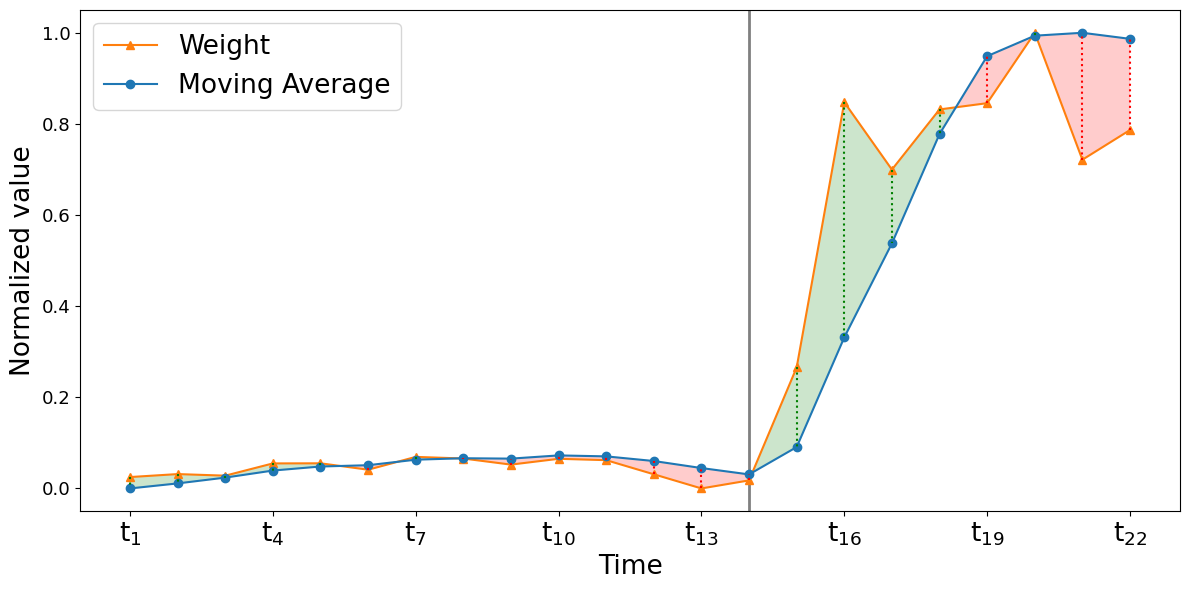

In [31]:
flows.plot(paths='34, 20, 20, 8')

### Plot delta weight

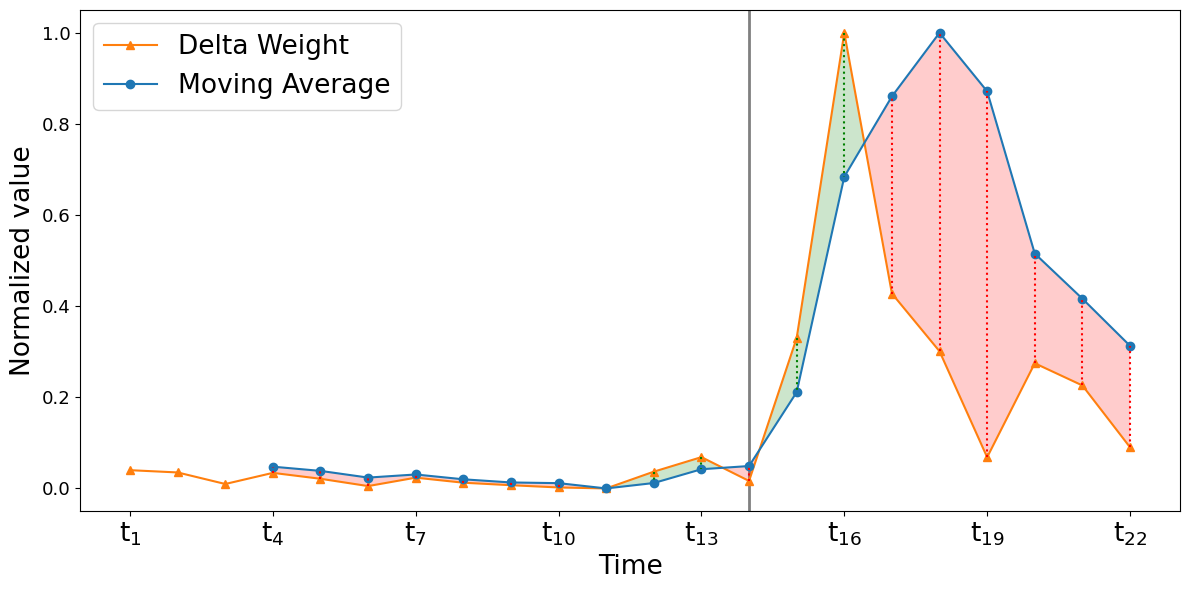

In [32]:
flows.plot(paths='34, 20, 20, 8', attr='delta_weight')

## Plot the weight of a flow wrongly highlighted as anomalous

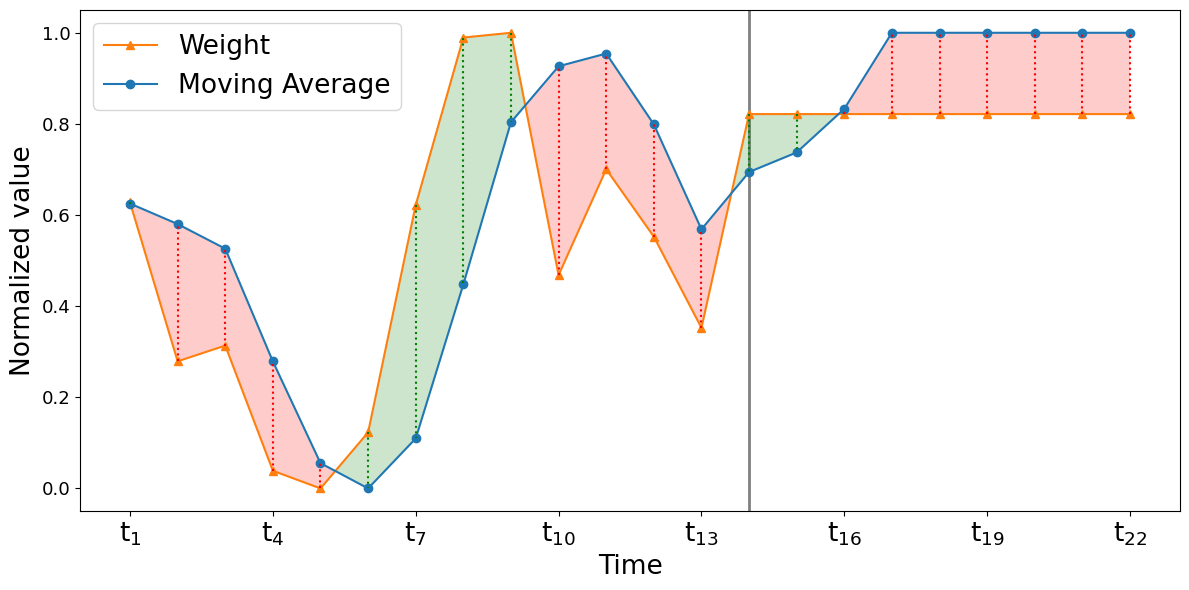

In [35]:
flows.plot(paths='34, 9, 9, 98')

# Load networks and flows already created

In [36]:
flows = fs.FlowSeries(data_path='data_sintetic_flows')